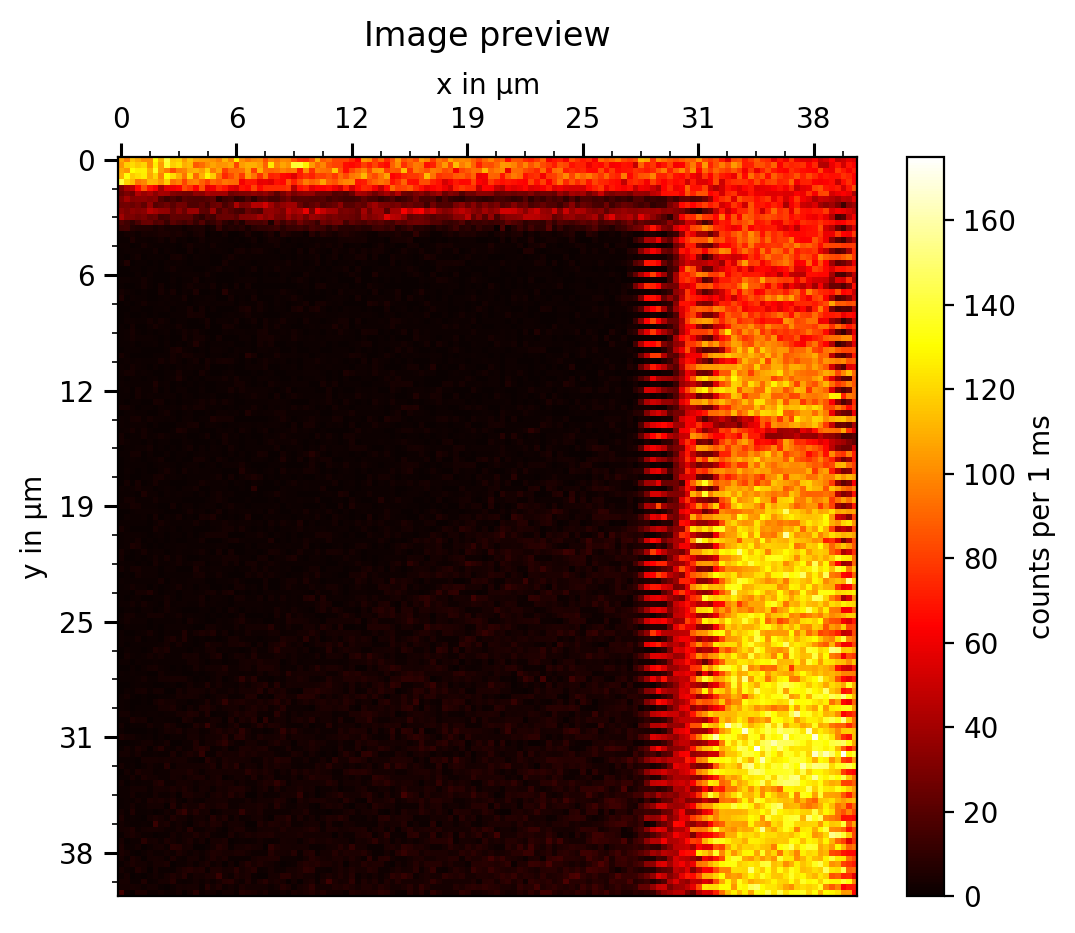

Data (arrays) in image file:
  - preview : (128, 128), int64
  -    APD1 : (128, 128), int64
  -    APD2 : (128, 128), int64




In [1]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, push_notebook, show, curdoc


from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats

import numpy as np

from modules.load import image
from modules.visualize import plot

img = image.load_from_path('/Users/kappel/Desktop/scan test/shift_correction/grid_60x60_bidir_03.img')
img.preview()



#fida_results = analyze.fida(test_img)
#plot.preview(fida_results)


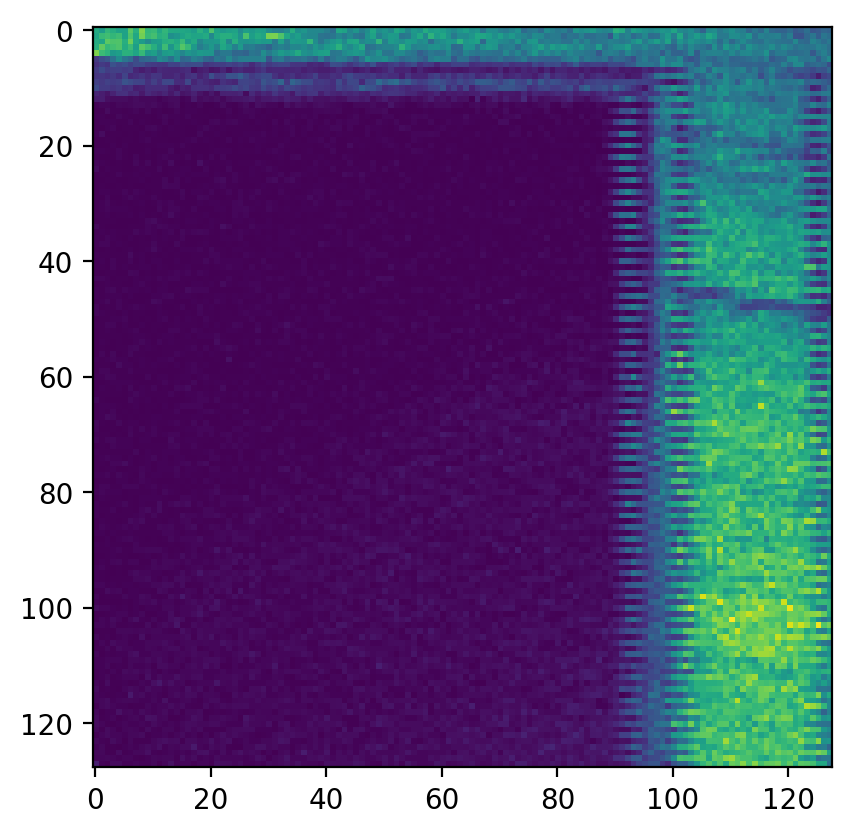

In [2]:
image_bidir = img.data['preview']
plt.imshow(image_bidir)

In [3]:
def correct_shift(image):
    # Initialize a copy of the image for correction
    corrected_image = image.copy()
    
    # Iterate over every second row, starting from the first row

    # Define the shifting pattern
    height, width = image.shape[:2]
    num_rows = height // 2

    shift_pattern = np.linspace(7, 4, num_rows).astype(int)

    x = 28  # Number of times the value 7 should be repeated
    y = 16  # Number of times the value 5 should be repeated
    z = 20  # Number of times the value 4 should be repeated

    alt_shift_pattern = np.repeat([6, 5, 4], [x, y, z])

    
    print(height)
    print(width)

    """for row in range(1, image.shape[0], 2):
        # Shift the pixels in the row by half a pixel in the opposite direction
        shift_amount = -int((row % 2) * 2 - 1) * 6
        corrected_image[row] = np.roll(image[row], shift_amount)"""
        
    
    # Iterate over every second row, starting from the first row
    for i, row in enumerate(range(1, height, 2)):
        shift_amount = -int((row % 2) * 2 - 1) * shift_pattern[i]
        
        # Shift the pixels in the row by the computed amount
        corrected_image[row] = np.roll(image[row], shift_amount)

    return corrected_image

128
128
[7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


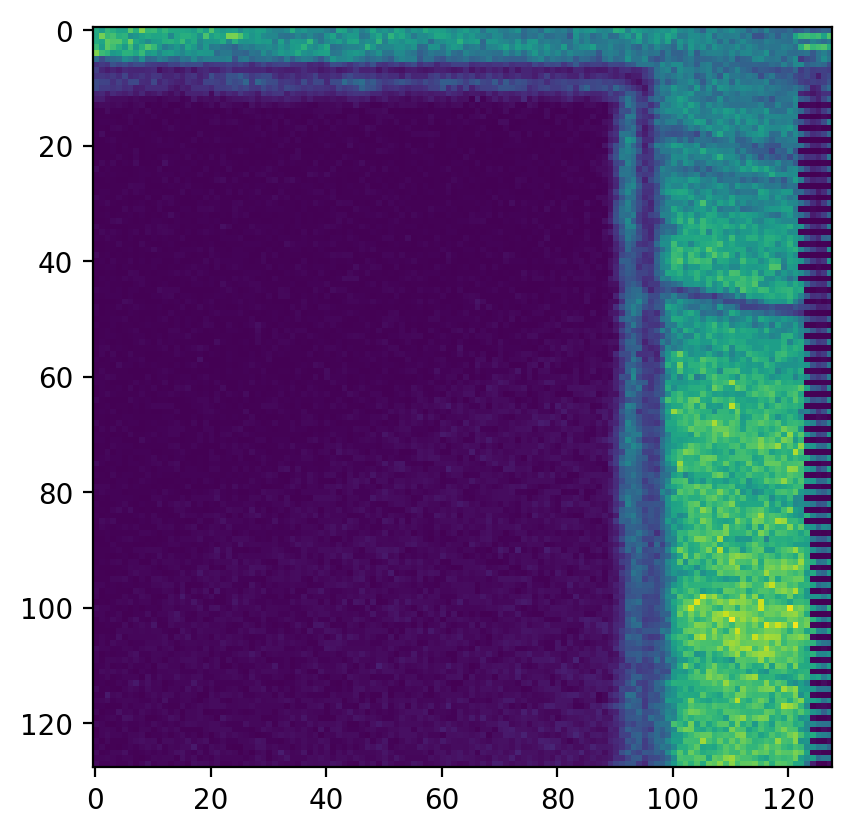

In [4]:
image_corrected = correct_shift(image_bidir)
plt.imshow(image_corrected)
print(np.linspace(7, 3, 128).astype(int))

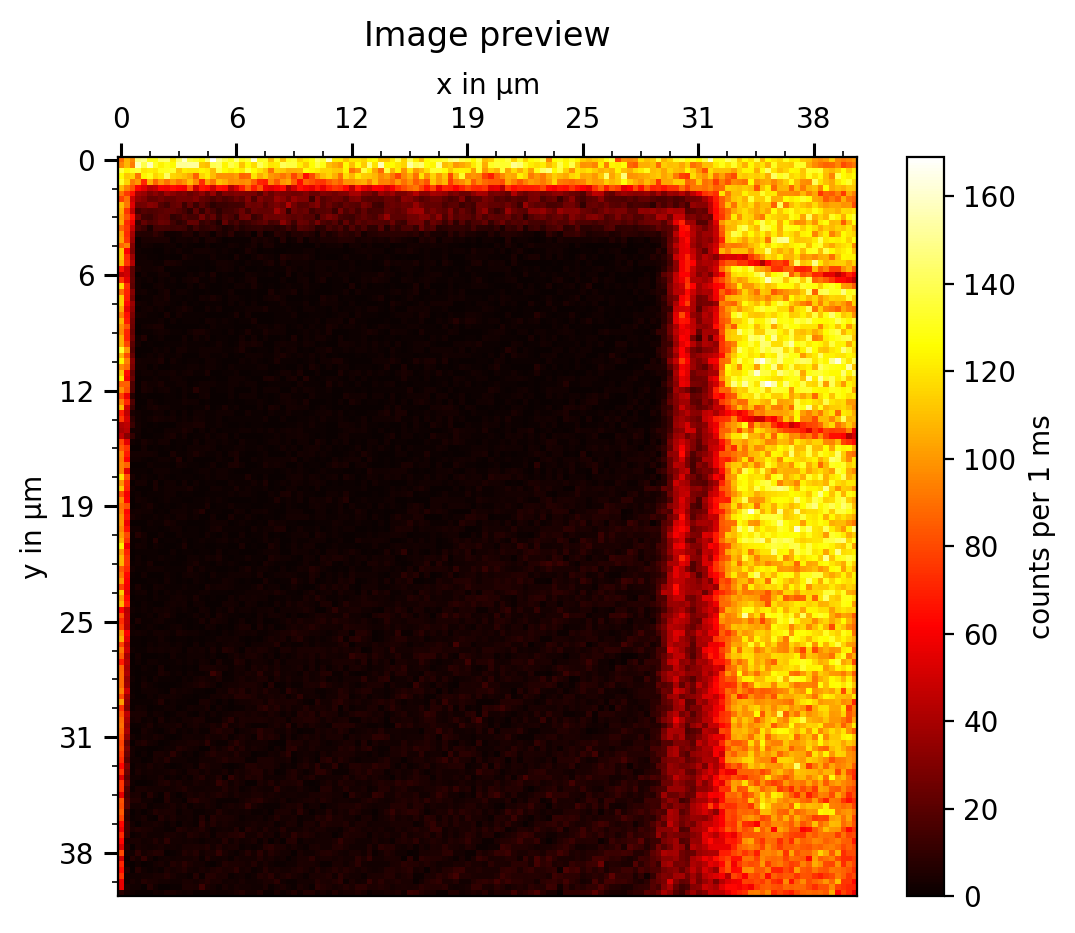

Data (arrays) in image file:
  - preview : (128, 128), int64
  -    APD1 : (128, 128), int64
  -    APD2 : (128, 128), int64




In [5]:
img_unidir = image.load_from_path('/Users/kappel/Desktop/scan test/shift_correction/grid_60x60_unidir_03.img')
img_unidir.preview()

shifted_unidir = np.roll(img_unidir.data['preview'], -3, axis=1)

shifted_image = img_unidir.data['preview']
shift_pattern = np.linspace(8, 3, 128).astype(int)

for i, row in enumerate(range(1, 128, 2)):
        shift_amount = -shift_pattern[i]
        
        # Shift the pixels in the row by the computed amount
        shifted_image[row] = np.roll(img_unidir.data['preview'][row], shift_amount)

#plt.imshow(shifted_image)

In [6]:
from skimage.metrics import structural_similarity as ssim

def visualize_similarity(image1, image2):
    # Compute the structural similarity index (SSIM) between the images
    ssim_score = ssim(image1, image2, data_range=image2.max() - image2.min(), multichannel=True)
    
    # Compute the absolute difference between the images
    diff = np.abs(image1 - image2)
    
    # Plot the images side by side with a difference map
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    
    axes[0].imshow(image1, cmap='gray')
    axes[0].set_title('Image 1')
    axes[0].axis('off')
    
    axes[1].imshow(image2, cmap='gray')
    axes[1].set_title('Image 2')
    axes[1].axis('off')
    
    axes[2].imshow(diff, cmap='gray')
    axes[2].set_title('Difference Map')
    axes[2].axis('off')
    
    plt.suptitle(f'Structural Similarity Index (SSIM): {ssim_score:.4f}')
    plt.tight_layout()
    plt.show()


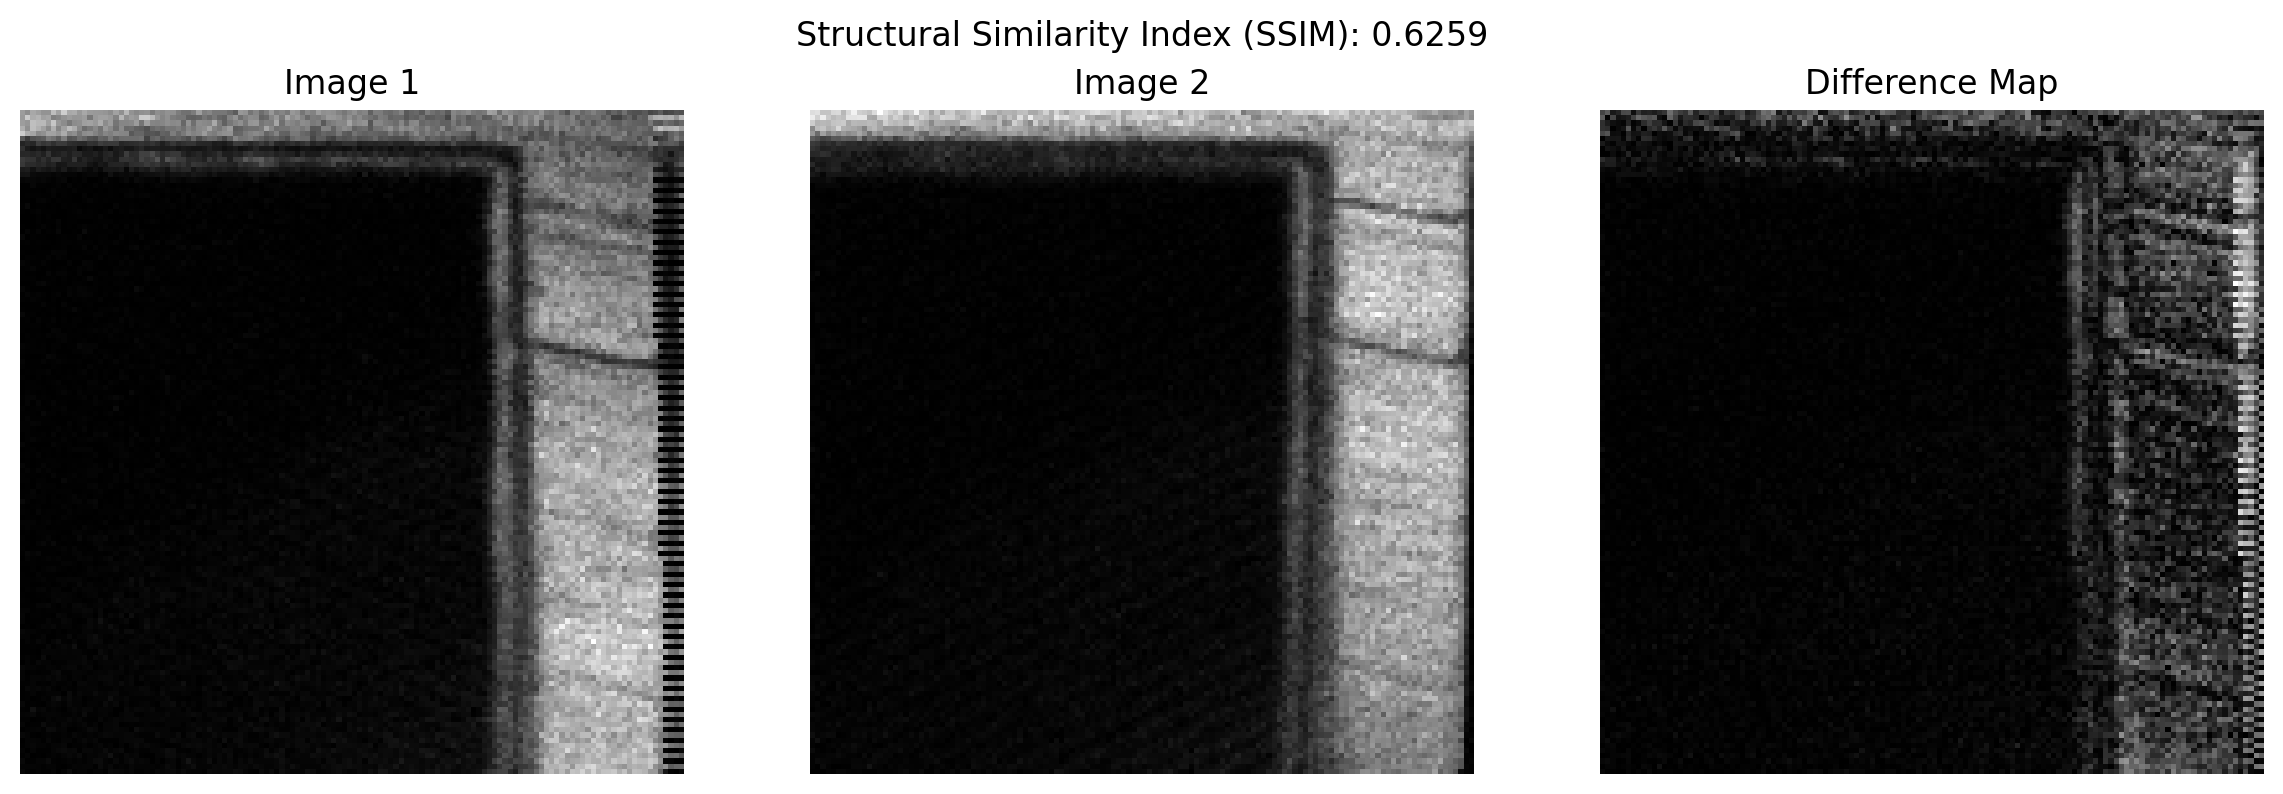

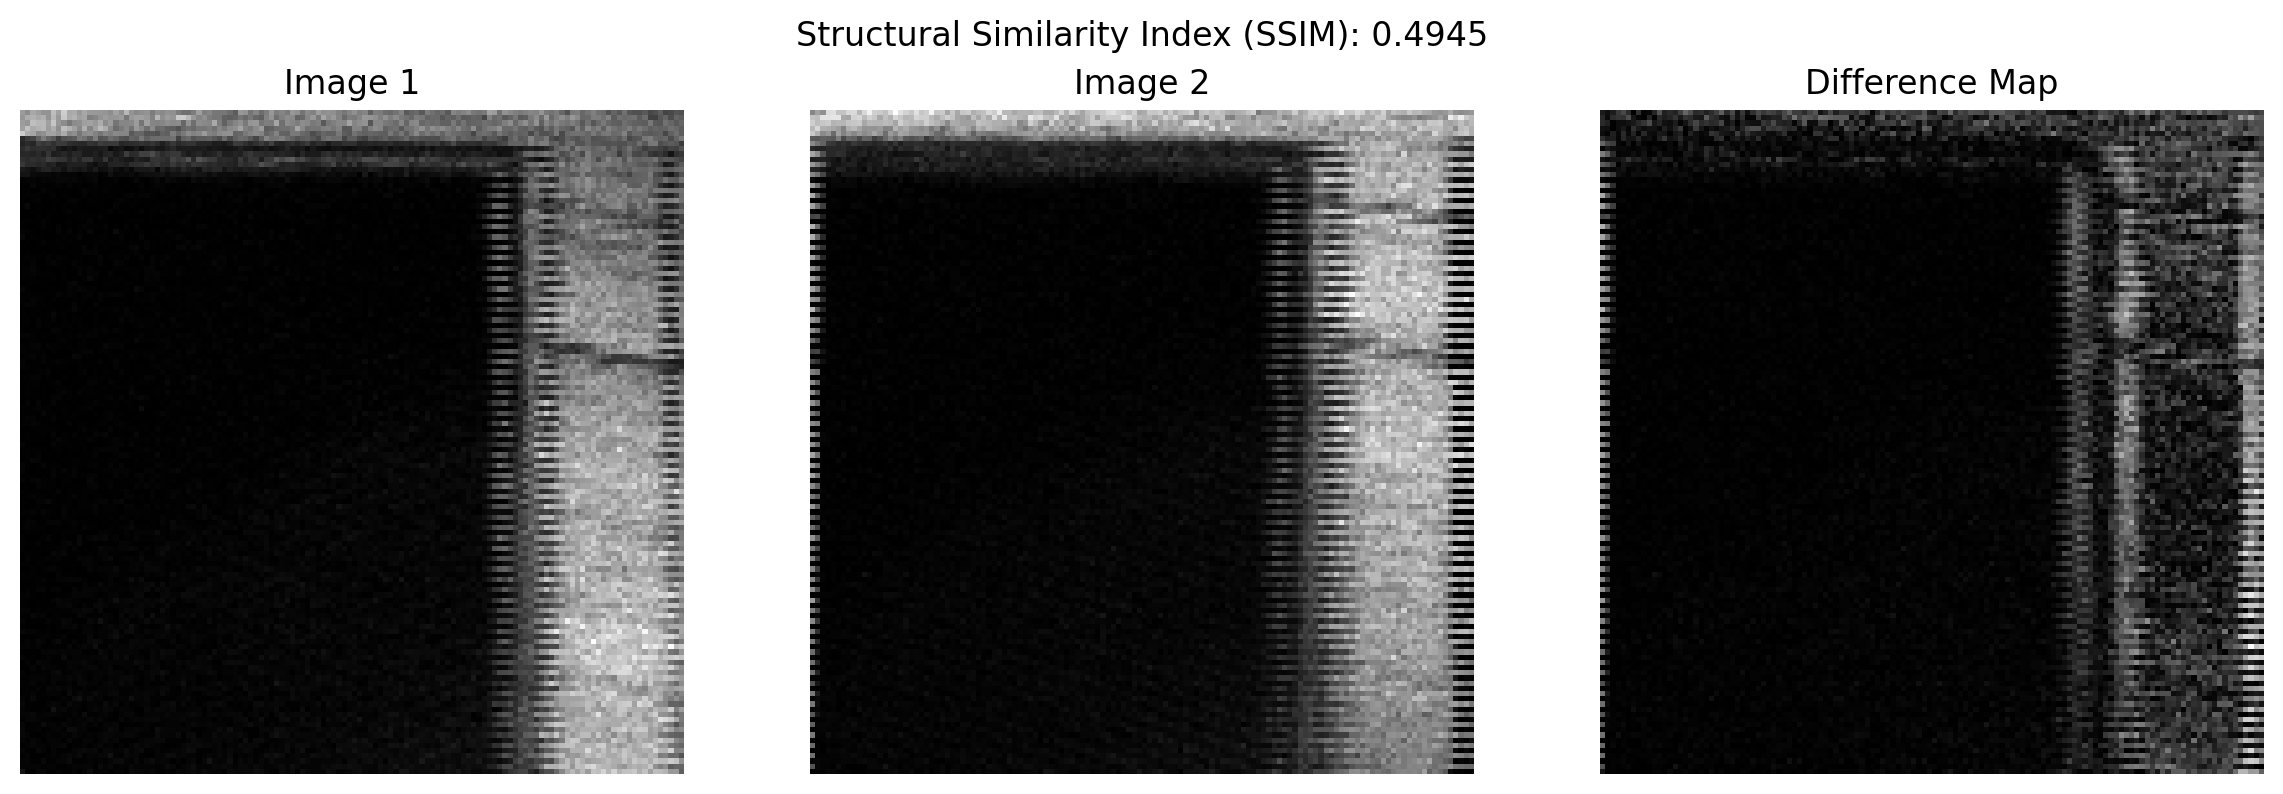

In [7]:
visualize_similarity(image_corrected, shifted_unidir)
visualize_similarity(image_bidir, shifted_image)

In [8]:
image10 = image.load_from_path('/Users/kappel/Desktop/scan test/shift_correction/grid_10x10_unidir.img')
#image_10 = correct_shift(image10.data['preview'])
#plt.imshow(image_10)
#plt.imshow(image10.data['preview'])
output_notebook()
image10.explore()


Loading BokehJS ...

In [9]:
vertical = img.data['APD1']
horizontal = img.data['APD2']

#diff = vertical - horizontal
diff = horizontal - vertical



/var/folders/2h/6xcys3mx1s7czfj28g_dc70r0000gn/T/ipykernel_30720/131811416.py:37: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


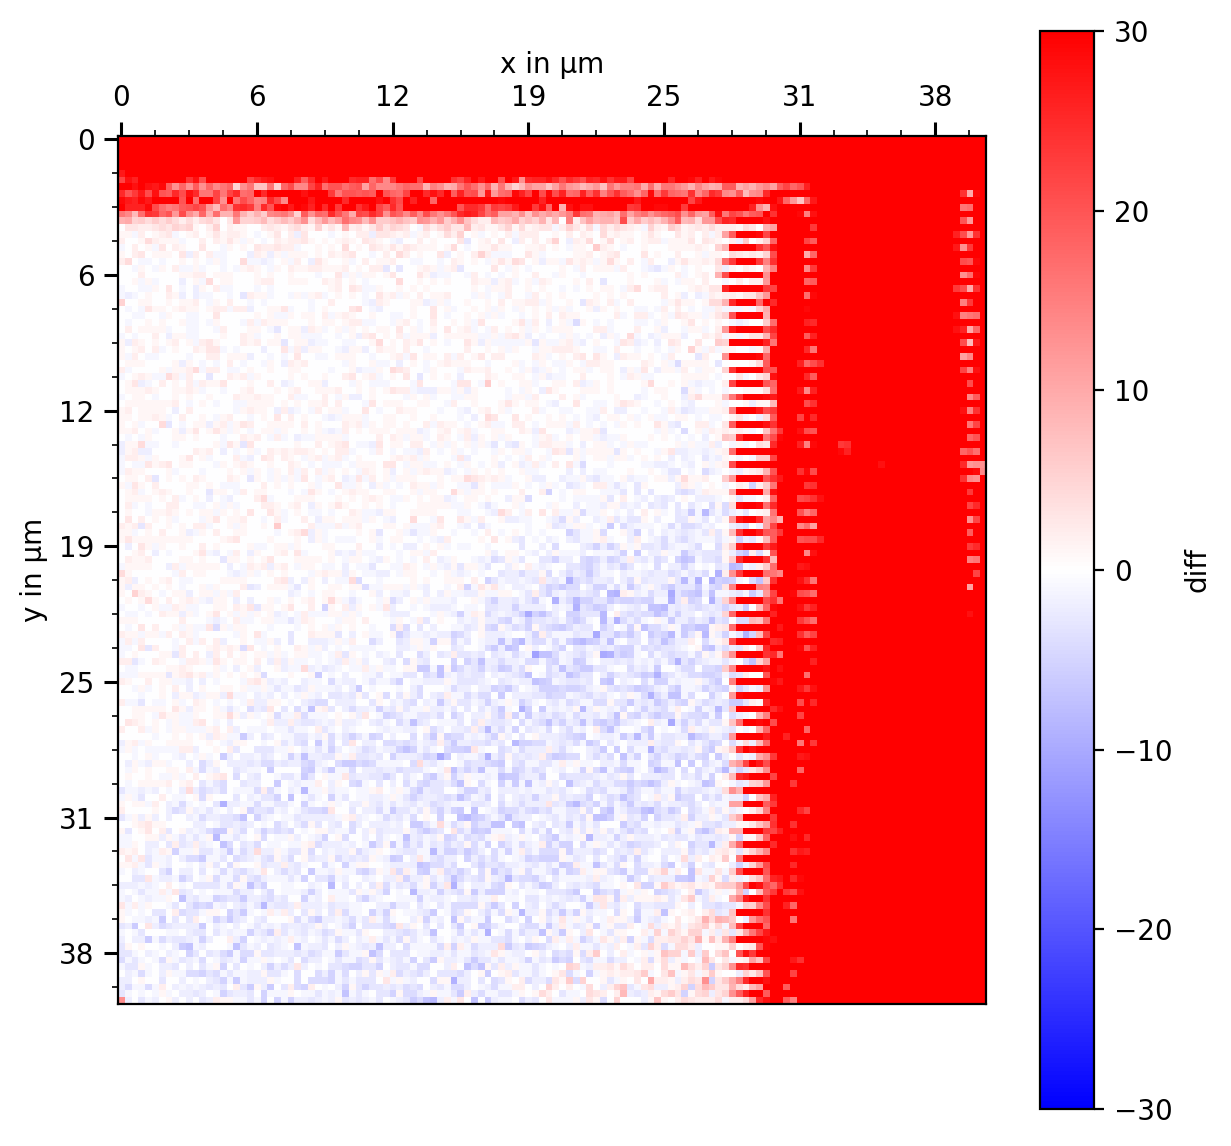

In [10]:
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(diff, cmap='bwr', vmin=-30, vmax=30)
cbar = fig.colorbar(im, label='diff')
    
# set major tick options
plt.tick_params(axis='both', 
                    which='major',
                    labelsize=10, 
                    labelbottom=False,
                    bottom=False, 
                    top=True, 
                    labeltop=True,
                    length=5, 
                    width=1.1)
    
# set minor tick options
plt.tick_params(axis='both', 
                    which='minor',
                    labelsize=10, 
                    labelbottom=False,
                    bottom=False, 
                    top=True, 
                    labeltop=True,
                    direction='out')
    
scaling_factor_x = (img.range_x*1e6)/img.pixel_x
scaling_factor_y = (img.range_y*1e6)/img.pixel_y
rounded_x_ticks = lambda x, _:'{:d}'.format(round(x*scaling_factor_x))
rounded_y_ticks = lambda y, _:'{:d}'.format(round(y*scaling_factor_y))

ax.xaxis.set_major_formatter(rounded_x_ticks)
ax.yaxis.set_major_formatter(rounded_y_ticks)

plt.minorticks_on()
plt.xlabel('x in µm')
plt.ylabel('y in µm')
set_matplotlib_formats('retina')
ax.xaxis.set_label_position('top')
plt.show()

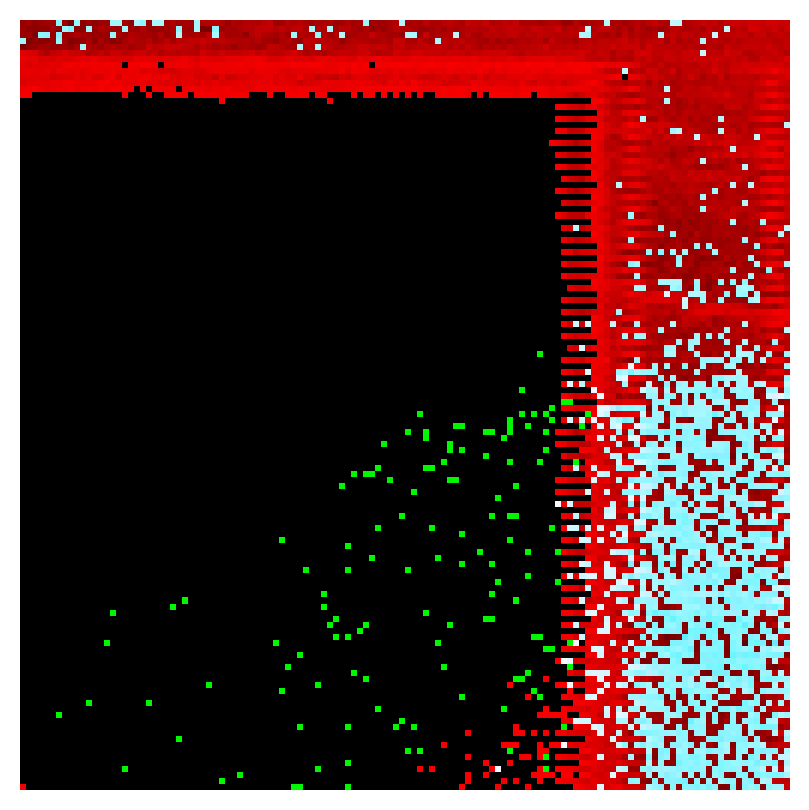

In [11]:
detector1 = vertical
detector2 = horizontal

# threshold
threshold = 8

# Compute the result image based on the two detectors
result = np.zeros((128, 128, 3))
result[:, :, 0] = np.where(horizontal < threshold, 0, horizontal) * 255  # Red channel
result[:, :, 1] = np.where(vertical < threshold, 0, vertical) * 255  # Green channel
result[:, :, 2] = np.logical_and( horizontal >= threshold, vertical >= threshold) * 255  # Yellow channel

# Plot the resulting image
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(result.astype(np.uint8))
ax.set_axis_off()
plt.show()